
Charts and financial indicators of PETR4.SA over the period of 2012 and 2022



Libraries


In [28]:

import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression




 PETR4.SA stock value in the period


In [15]:

petr4 = yf.download('PETR4.SA', start='2012-01-01', end='2022-12-31')

petr4 = petr4[['Open', 'High', 'Low', 'Close', 'Volume']]

petr4['Day of Week'] = petr4.index.day_name()

print(petr4)


[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close    Volume Day of Week
Date                                                                        
2012-01-02  21.510000  22.120001  21.260000  21.730000  20391300      Monday
2012-01-03  21.830000  22.410000  21.809999  22.410000  22940500     Tuesday
2012-01-04  22.180000  22.580000  21.980000  22.570000  18736900   Wednesday
2012-01-05  22.389999  22.610001  22.150000  22.309999  19489000    Thursday
2012-01-06  22.469999  22.580000  22.250000  22.330000  13941000      Friday
...               ...        ...        ...        ...       ...         ...
2022-12-23  24.129999  25.219999  24.129999  25.120001  68387900      Friday
2022-12-26  25.120001  25.299999  24.820000  24.940001  28765200      Monday
2022-12-27  25.250000  25.309999  24.549999  25.110001  50803200     Tuesday
2022-12-28  25.100000  25.320000  24.750000  24.799999  57293500   Wednesday
2022-12


PETR4.SA chart in the perior


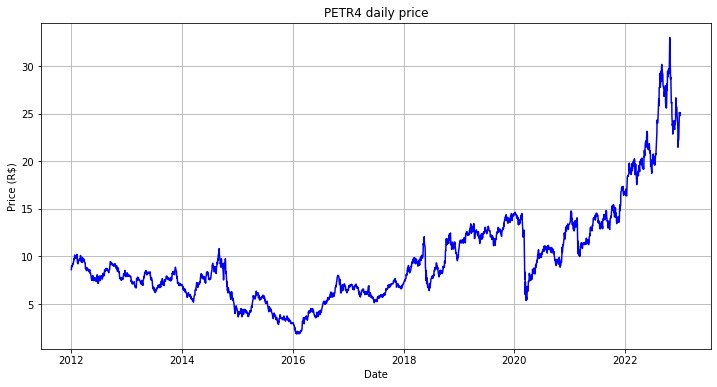

In [48]:


petr4 = yf.Ticker("PETR4.SA")
petr4_data = petr4.history(start="2012-01-02", end="2022-12-29")

plt.figure(figsize=(12, 6))
plt.plot(petr4_data["Close"], color="blue")
plt.title("PETR4 daily price")
plt.xlabel("Date")
plt.ylabel("Price (R$)")
plt.grid()

plt.show()




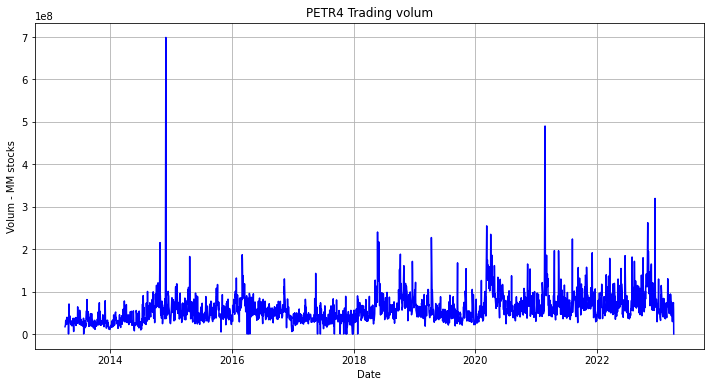

In [49]:


petr4 = yf.Ticker("PETR4.SA")
petr4_data = petr4.history(period="10y")

plt.figure(figsize=(12, 6))
plt.plot(petr4_data.index, petr4_data["Volume"], color="blue")
plt.title("PETR4 Trading volum")
plt.xlabel("Date")
plt.ylabel("Volum - MM stocks")
plt.grid()

plt.show()



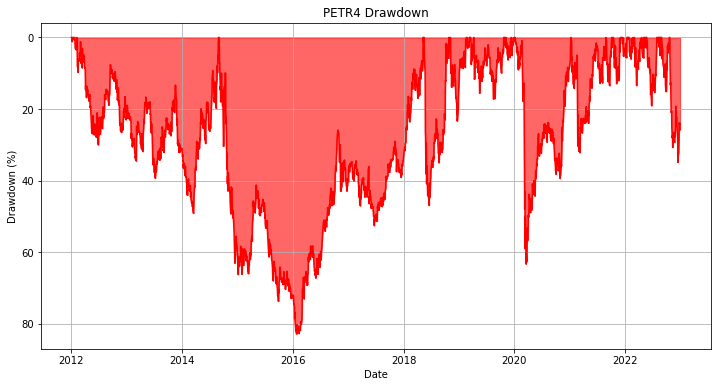

In [42]:


petr4 = yf.Ticker("PETR4.SA")
petr4_data = petr4.history(start="2012-01-01", end="2022-12-31")

petr4_data["Max"] = petr4_data["Close"].cummax()
petr4_data["Drawdown"] = (petr4_data["Max"] - petr4_data["Close"]) / petr4_data["Max"]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(petr4_data["Drawdown"]*100, color="red")
ax.set_title("PETR4 Drawdown")
ax.set_xlabel("Date")
ax.set_ylabel("Drawdown (%)")
ax.grid()

ax.invert_yaxis()

ax.fill_between(petr4_data.index, petr4_data["Drawdown"]*100, 0, alpha=0.6, color="red")

plt.show()



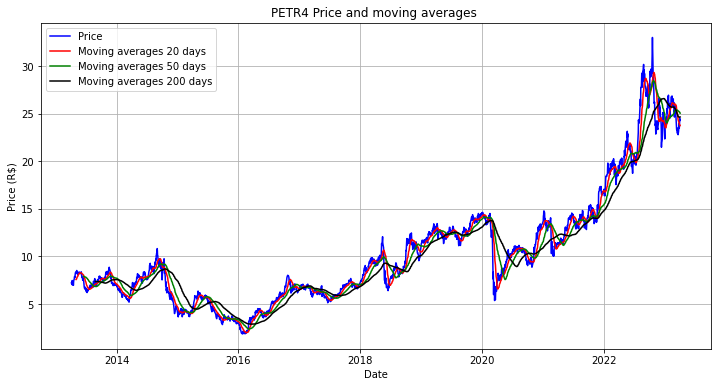

In [47]:

petr4 = yf.Ticker("PETR4.SA")
petr4_data = petr4.history(period="10y")

petr4_data["MA20"] = petr4_data["Close"].rolling(window=20).mean()
petr4_data["MA50"] = petr4_data["Close"].rolling(window=50).mean()
petr4_data["MA200"] = petr4_data["Close"].rolling(window=100).mean()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(petr4_data["Close"], color="blue", label="Price")
ax.plot(petr4_data["MA20"], color="red", label="Moving averages 20 days")
ax.plot(petr4_data["MA50"], color="green", label="Moving averages 50 days")
ax.plot(petr4_data["MA200"], color="black", label="Moving averages 200 days")

ax.set_title("PETR4 Price and moving averages ")
ax.set_xlabel("Date")
ax.set_ylabel("Price (R$)")
ax.grid()
ax.legend()

plt.show()


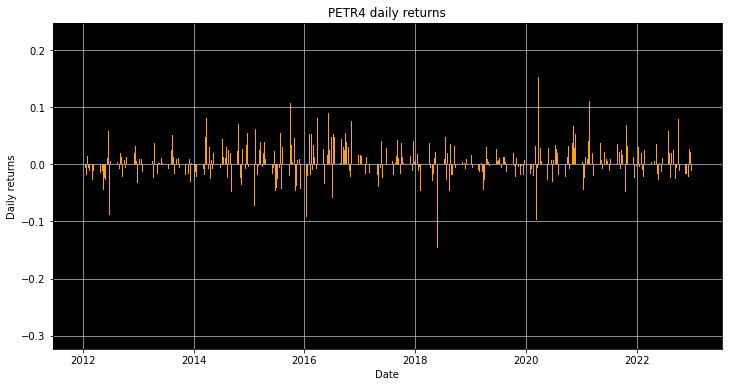

In [45]:

petr4 = yf.Ticker("PETR4.SA")
petr4_data = petr4.history(start="2012-01-01", end="2022-12-31")

petr4_data["Return"] = petr4_data["Close"].pct_change()

petr4_data = petr4_data.dropna()

plt.figure(figsize=(12, 6))
plt.bar(petr4_data.index, petr4_data["Return"], color="orange")
plt.title("PETR4 daily returns")
plt.xlabel("Date")
plt.ylabel("Daily returns")
plt.grid()

plt.gca().set_facecolor('black')

plt.show()


In [51]:

petr4 = yf.Ticker("PETR4.SA")
petr4_data = petr4.history(start="2012-01-01", end="2022-12-31")

petr4_data = petr4_data[["Close"]]
petr4_data["Date"] = petr4_data.index


In [52]:

x = np.arange(len(petr4_data))
y = petr4_data["Close"].values
p = np.polyfit(x, y, deg=1)
regression_line = p[1] + x*p[0]


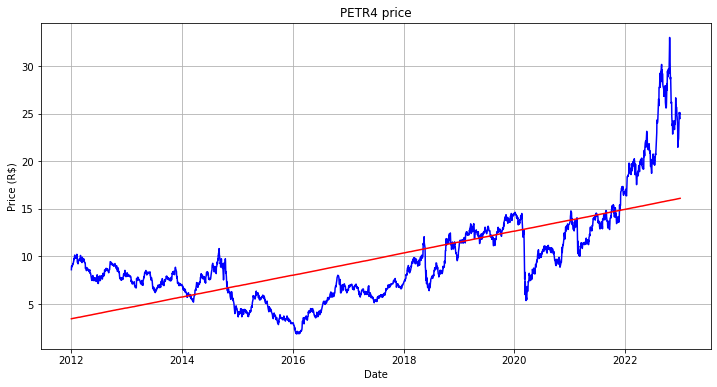

In [53]:

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(petr4_data["Date"], petr4_data["Close"], color="blue")
ax.plot(petr4_data["Date"], regression_line, color="red")
ax.set_title("PETR4 price")
ax.set_xlabel("Date")
ax.set_ylabel("Price (R$)")
ax.grid()

plt.show()


In [59]:


import pandas as pd
import numpy as np
import yfinance as yf

petr4 = yf.download('PETR4.SA', start='2012-01-01', end='2022-12-31')
df = pd.DataFrame({'Date': petr4.index, 'Close': petr4['Adj Close']}).reset_index(drop=True)

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_numeric(df['Date'])

X = df[['Date']]
y = df['Close']
reg = LinearRegression().fit(X, y)

print(f' the angular coefficient is: ',reg.coef_[0])





[*********************100%***********************]  1 of 1 completed
 the angular coefficient is:  3.6473702887788444e-17


In [60]:


petr4 = yf.download('PETR4.SA', start='2012-01-01', end='2022-12-31')
df = pd.DataFrame({'Date': petr4.index, 'Close': petr4['Adj Close']}).reset_index(drop=True)

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_numeric(df['Date'])

X = df[['Date']]
y = df['Close']
reg = LinearRegression().fit(X, y)

print(f' the intercept is: ' ,reg.intercept_)




[*********************100%***********************]  1 of 1 completed
 the intercept is:  -44.90558642734386


In [62]:

print(f'The Linear equation of PETR4  in the 2012-2022 period is:  Y = X{reg.coef_[0]} {reg.intercept_} ')


The Liniear equation of PETR4  in the 2012-2022 period is:  Y = X3.6473703026988275e-17 -44.90558642734386 
